In [3]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import libraries
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cross_validation import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

## Overfitting in linear regression

In [5]:
#Load the data
overfitting_data = pandas.read_csv('./data/overfitting_data.csv')
overfitting_data.head()

,X,Y
0,0.139925,0.581130
1,0.648120,-0.194055
2,0.541590,0.483162
3,0.724928,-0.449584
4,0.350579,0.795314


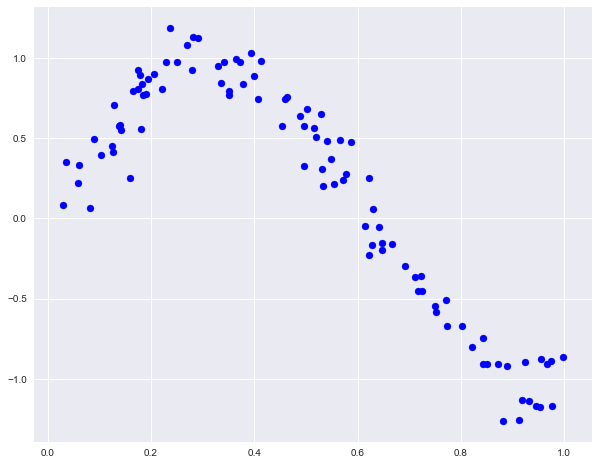

In [6]:
#First plot the data
plt.scatter(overfitting_data['X'], overfitting_data['Y'],  color='blue',data=overfitting_data)

In [7]:
#Divide the data into training and test set. train set contains 70% of the data. test set contains 30% of the data.
X = overfitting_data['X']
Y = overfitting_data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

We will use different degree of polynomial on this data and check the result.

In [8]:
#First create a function that take number of degree, train and test data and generate regression curve.
def linear_regression_with_degree(X_train,Y_train,X_test,Y_test,degree):
    
    #Make pipeline for higher degree feature
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #Change training and test data as requirement
    X_test = pandas.DataFrame(X_test,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test)
    Y_test = Y_test.ix[X_test.index]

    #Generate predictions
    Y_pred = model.predict(X_test)
    #Perform spline smoothing. Higher degree lines will be much smooth. 
    smooth_feature = numpy.linspace(numpy.min(X_test['X'].tolist()),numpy.max(X_test['X'].tolist()),1000) 
    smooth_points = spline(X_test['X'].tolist(),Y_pred,smooth_feature)
    
    #Plot the curve
    plt.scatter(X_test, Y_test,  color='blue')
    plt.plot(smooth_feature,smooth_points,'-g')
    plt.title('Mean absolute error: %.4f' % mean_absolute_error(Y_test,Y_pred) )

In [9]:
#Function calculates and return mean absolute error
def linear_regression_with_degree_mae(X_train,Y_train,X_test,Y_test,degree):
    
    #Make pipeline for higher degree feature
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #Change training and test data as requirement
    X_test = pandas.DataFrame(X_test,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test)
    Y_test = Y_test.ix[X_test.index]

    #Generate predictions
    Y_pred = model.predict(X_test)
    return mean_absolute_error(Y_test,Y_pred)

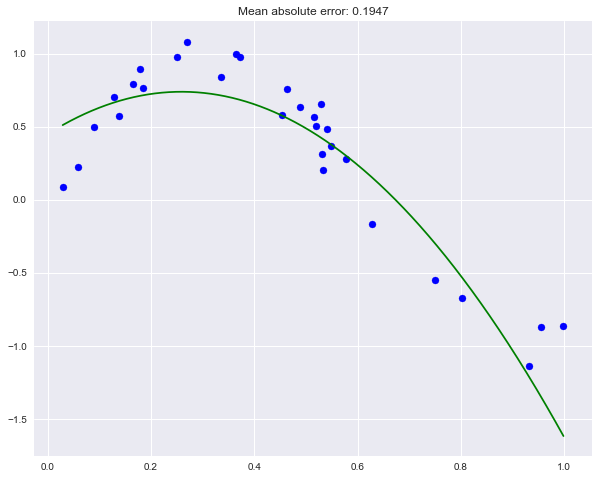

In [10]:
# Fit model with degree = 2
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,2)

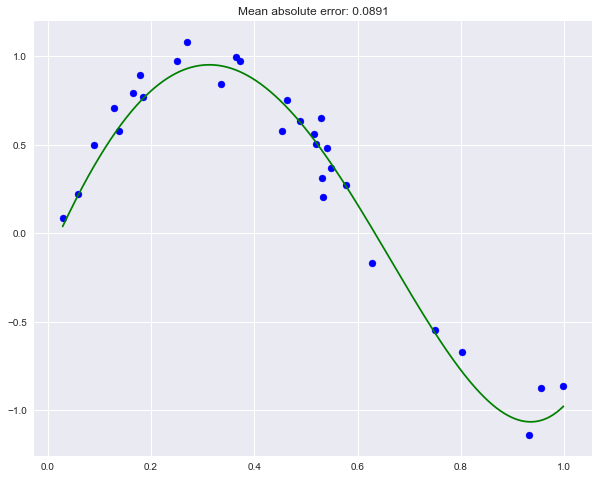

In [11]:
# Fit model with degree = 4
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,4)

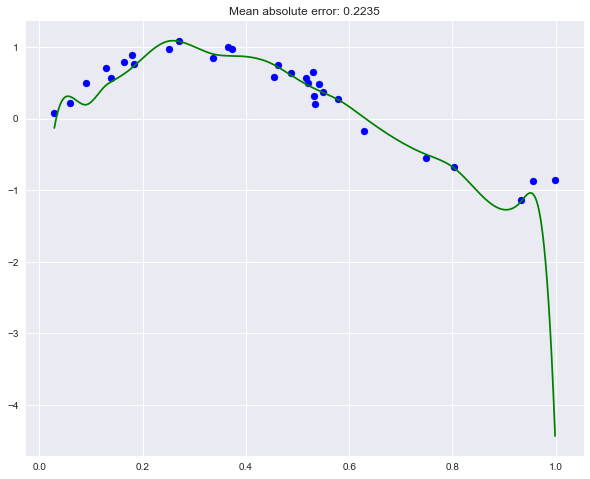

In [12]:
# Fit model with degree = 16
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,16)

As we can see that increasing degree (or complexity) not always help. On test data, degree=4 is giving good result compare to degree= 2. When we increased the degree to 16, performance reduces. Model is trying to fit accurately on training data and performing bad on generalized data.

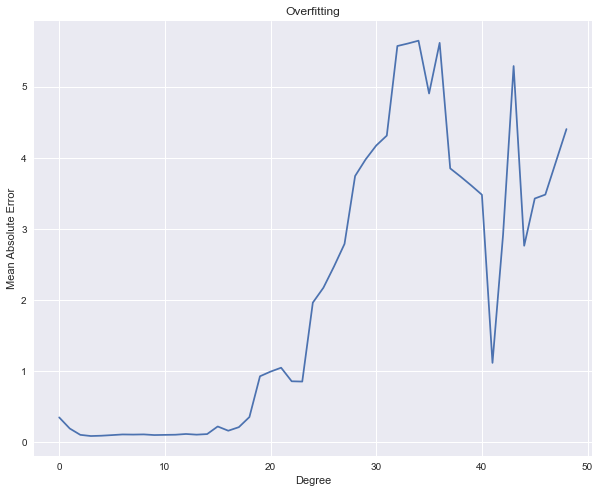

In [13]:
error_values = list()
for i in range(1,50):
    error_values.append(linear_regression_with_degree_mae(X_train,Y_train,X_test,Y_test,i))
plt.plot(error_values)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Degree')
plt.title('Overfitting')

## Ridge Regression

First we will try ridge regression on our boston housing data.

In [45]:
#Split the data 
BX_train, BX_test, BY_train, BY_test = train_test_split(boston_data_X, boston_data_Y, test_size=0.20)

In [46]:
ridge_regression = Ridge()

In [47]:
ridge_regression.fit(BX_train,BY_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
BY_pred = ridge_regression.predict(BX_test)

In [49]:
print('Mean absolute error: %.2f' % mean_absolute_error(BY_test,BY_pred))

Mean absolute error: 3.91


We can use different combination of parameters to get better results. In ridge regression, we can tune following parameters

-  alpha : Regularization strength. Tuning parameter which controls 
-  normalize : boolean. Normalize data or not.
-  max_iter : maximum number of iteration.
-  solve : which solver to use {‘auto’,  ‘saga’, ‘lsqr’, ‘sparse_cg’, ‘svd’, ‘cholesky’, ‘sag’}

In [50]:
# Ridge regression modified
ridge_regression = Ridge(alpha=0.2,normalize=True,max_iter=1000,solver='cholesky')
ridge_regression.fit(BX_train,BY_train)
BY_pred = ridge_regression.predict(BX_test)
print('Mean absolute error: %.2f' % mean_absolute_error(BY_test,BY_pred))

Mean absolute error: 3.89


Ridge regression help in reduce overfitting. We can apply higher penalty.

In [16]:
#First create a function that take number of degree, train and test data and generate regression curve.
def ridge_regression_with_degree(X_train,Y_train,X_test,Y_test,degree,alpha):
    
    #Make pipeline for higher degree feature
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #Change training and test data as requirement
    X_test = pandas.DataFrame(X_test,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test)
    Y_test = Y_test.ix[X_test.index]

    #Generate predictions
    Y_pred = model.predict(X_test)
    #Perform spline smoothing. Higher degree lines will be much smooth. 
    smooth_feature = numpy.linspace(numpy.min(X_test['X'].tolist()),numpy.max(X_test['X'].tolist()),1000) 
    smooth_points = spline(X_test['X'].tolist(),Y_pred,smooth_feature)
    
    #Plot the curve
    plt.scatter(X_test, Y_test,  color='blue')
    plt.plot(smooth_feature,smooth_points,'-g')
    plt.title('Mean absolute error: %.4f' % mean_absolute_error(Y_test,Y_pred) )

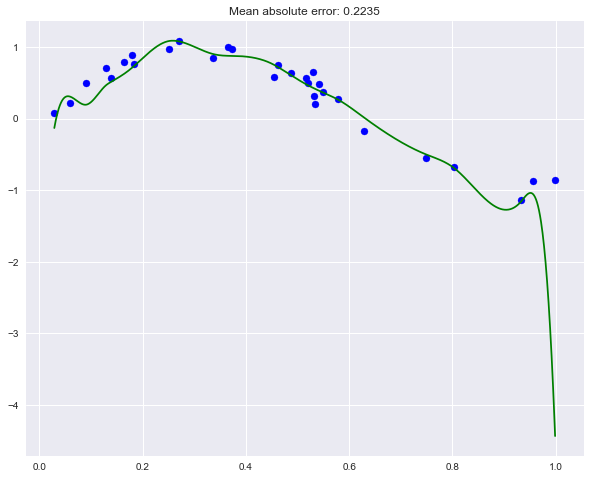

In [18]:
#alpha = 0 (Same as linear regression least square solution)
ridge_regression_with_degree(X_train,Y_train,X_test,Y_test,16,0)

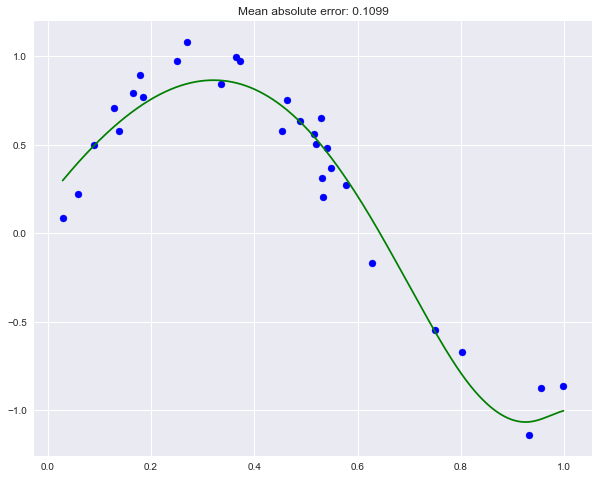

In [19]:
#alpha = 0.01 
ridge_regression_with_degree(X_train,Y_train,X_test,Y_test,16,0.01)

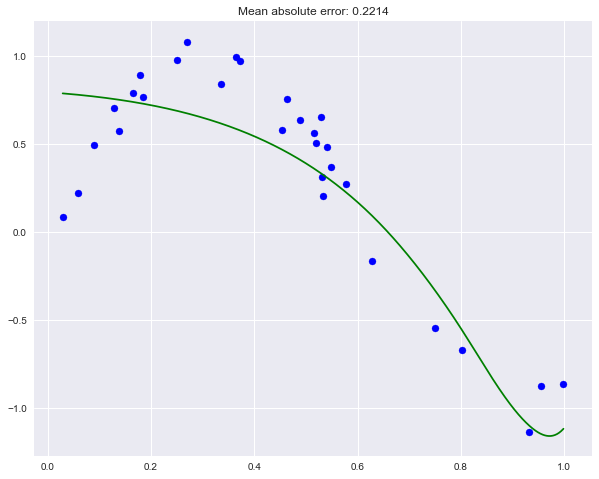

In [22]:
#alpha = 1
ridge_regression_with_degree(X_train,Y_train,X_test,Y_test,16,1)

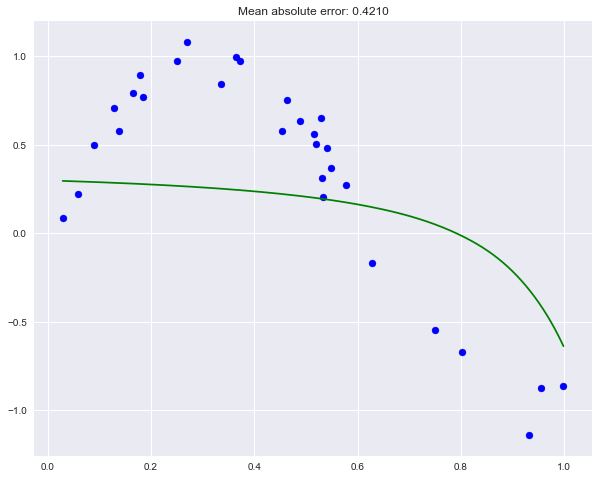

In [23]:
#alpha = 100
ridge_regression_with_degree(X_train,Y_train,X_test,Y_test,16,100)

## Lasso Regression

In [58]:
# Apply lasso regression on boston housing data
lasso_regression = Lasso(alpha=0.001,normalize=True,max_iter=1000)
lasso_regression.fit(BX_train,BY_train)
BY_pred = lasso_regression.predict(BX_test)
print('Mean absolute error: %.2f' % mean_absolute_error(BY_test,BY_pred))

Mean absolute error: 3.90


Similar to ridge regression, we can also choose parameters for lasso regression.

In [59]:
#First create a function that take number of degree, train and test data and generate regression curve.
def lasso_regression_with_degree(X_train,Y_train,X_test,Y_test,degree,alpha):
    
    #Make pipeline for higher degree feature
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #Change training and test data as requirement
    X_test = pandas.DataFrame(X_test,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test)
    Y_test = Y_test.ix[X_test.index]

    #Generate predictions
    Y_pred = model.predict(X_test)
    #Perform spline smoothing. Higher degree lines will be much smooth. 
    smooth_feature = numpy.linspace(numpy.min(X_test['X'].tolist()),numpy.max(X_test['X'].tolist()),1000) 
    smooth_points = spline(X_test['X'].tolist(),Y_pred,smooth_feature)
    
    return X_test,Y_test,smooth_feature,smooth_points,mean_absolute_error(Y_test,Y_pred)

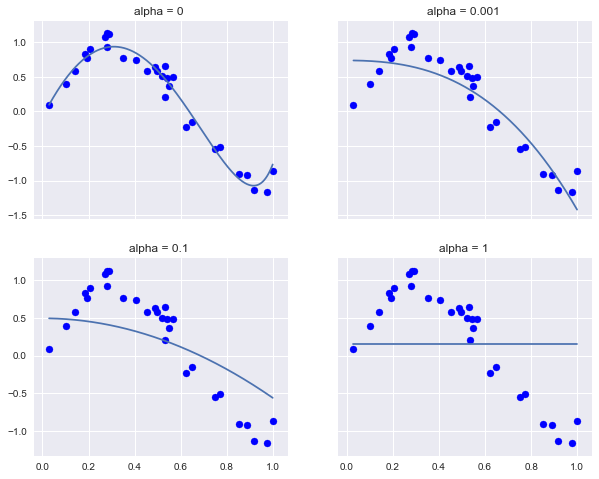

In [60]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
A,B,C,D,error = lasso_regression_with_degree(X_train,Y_train,X_test,Y_test,16,0)
ax1.scatter(A, B,  color='blue')
ax1.plot(C,D)
ax1.set_title('alpha = 0 ')

A,B,C,D,error = lasso_regression_with_degree(X_train,Y_train,X_test,Y_test,16,0.01)
ax2.scatter(A, B,  color='blue')
ax2.plot(C,D)
ax2.set_title('alpha = 0.001 ')

A,B,C,D,error = lasso_regression_with_degree(X_train,Y_train,X_test,Y_test,16,0.1)
ax3.scatter(A, B,  color='blue')
ax3.plot(C,D)
ax3.set_title('alpha = 0.1 ')

A,B,C,D,error = lasso_regression_with_degree(X_train,Y_train,X_test,Y_test,16,1)
ax4.scatter(A, B,  color='blue')
ax4.plot(C,D)
ax4.set_title('alpha = 1 ')

## K Neighbors Regression 

In [61]:
#Fit model on boston housing data
knn_regression = KNeighborsRegressor(n_neighbors=3)
knn_regression.fit(BX_train,BY_train)
BY_pred = knn_regression.predict(BX_test)
print('Mean absolute error: %.2f' % mean_absolute_error(BY_test,BY_pred))

Mean absolute error: 4.50


## Kernel Regression

In [62]:
#Fit model on boston housing data
kernel_regression = KernelRidge(alpha=0.5)
kernel_regression.fit(BX_train,BY_train)
BY_pred = kernel_regression.predict(BX_test)
print('Mean absolute error: %.2f' % mean_absolute_error(BY_test,BY_pred))

Mean absolute error: 3.73
